*Data Science Course - Telkom Digital Talent Incubator*


---




# **Clustering**

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

### **Import Libraries**

In [50]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

### **Import Raw Dataset**

In [58]:
# Import Dataset
df_mall = pd.read_csv('https://raw.githubusercontent.com/dev-hid/dti/main/Mall_Customers.csv', sep = ',')
df_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Prints the Dataset Information
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Prints Descriptive Statistics
df_mall.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


### **Data Preprocessing**

First, we standardize the data to equalize the range and/or data variability. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. 

In [59]:
#Replace 
df_mall['Gender'].replace(['Female','Male'], ['0','1'], inplace= True)
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [63]:
df_mall.drop('CustomerID', axis=1, inplace =True)
df_mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### **Data Visualization**

In [51]:
plt.style.use('fivethirtyeight')

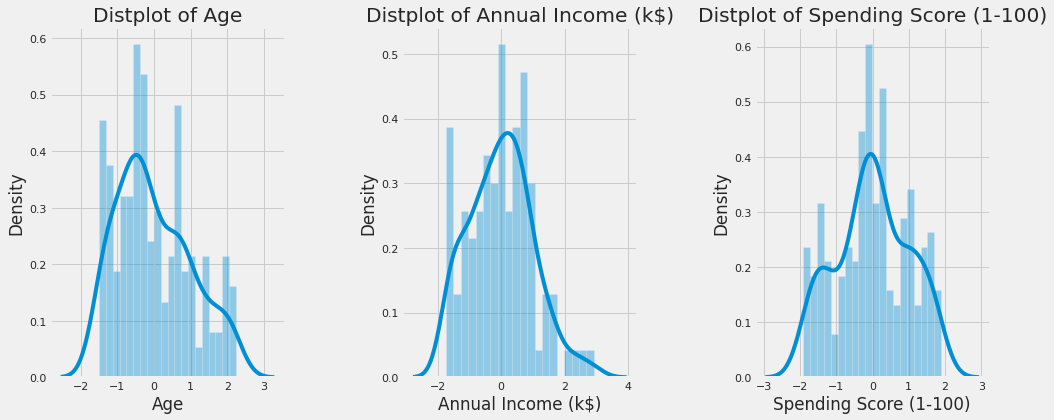

In [53]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_mall[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

## **K-Means Clustering**

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

### **Search for the Optimum Number of Clusters (k)**

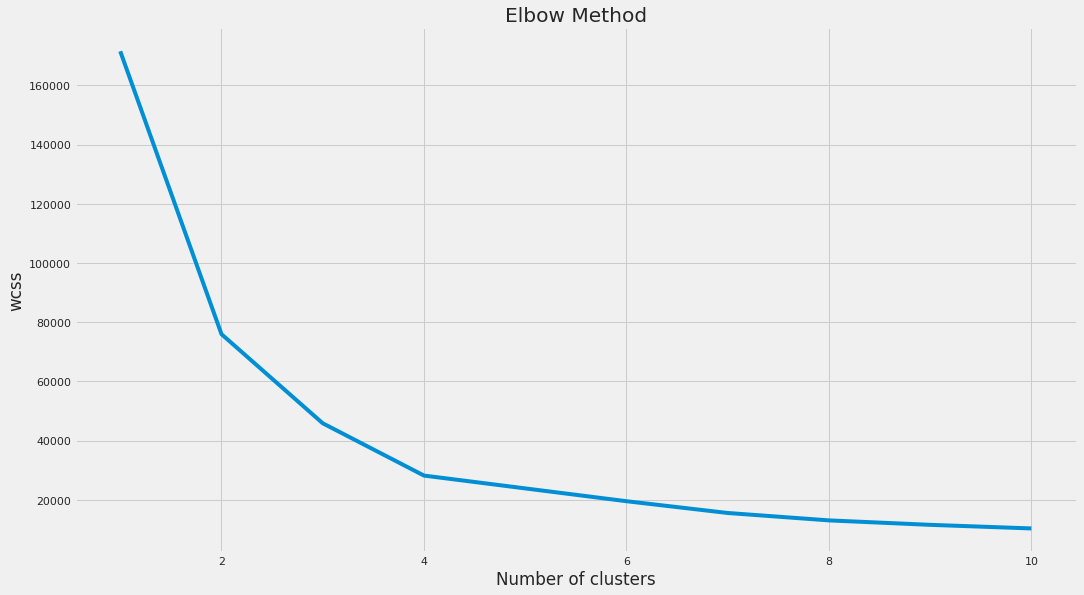

In [64]:
#Assign Age, Annual Income, Spending Score
X= df_mall.iloc[:, [1,3]].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [66]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(mall, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.29307334005502633
For n_clusters=3, The Silhouette Coefficient is 0.27772363950677986
For n_clusters=4, The Silhouette Coefficient is 0.24585091904596737
For n_clusters=5, The Silhouette Coefficient is 0.22399184737247052
For n_clusters=6, The Silhouette Coefficient is 0.1699107915723841
For n_clusters=7, The Silhouette Coefficient is 0.14525895031216443
For n_clusters=8, The Silhouette Coefficient is 0.14423757990089958
For n_clusters=9, The Silhouette Coefficient is 0.13231749040089877
For n_clusters=10, The Silhouette Coefficient is 0.10479003565073512


### **Modeling K-Means**

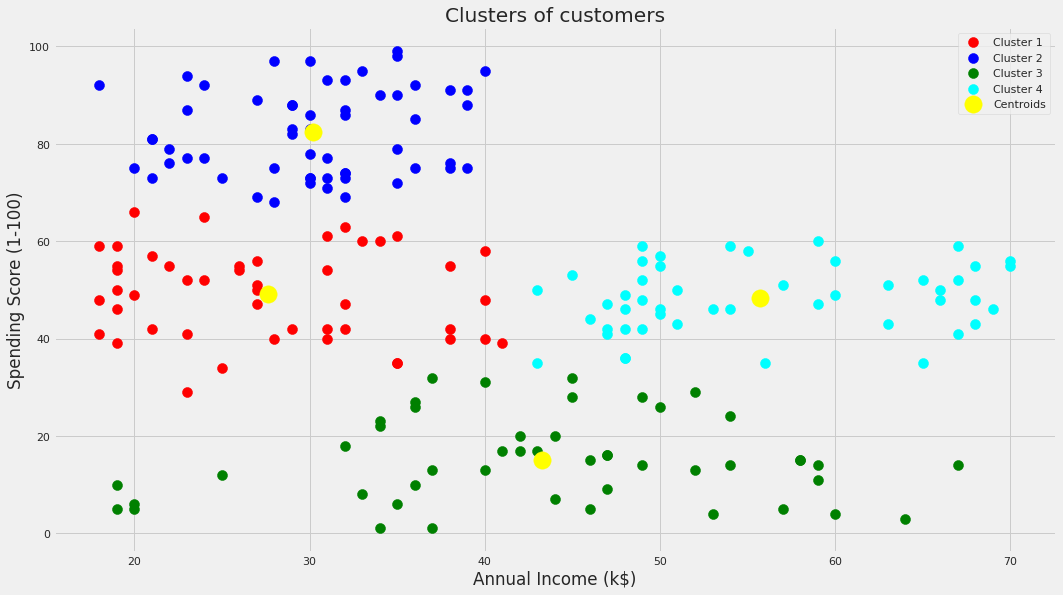

In [70]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(X)

# Visualising Clusters for k=3
plt.scatter(X[cluster == 0, 0], X[cluster == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[cluster == 1, 0], X[cluster == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[cluster == 2, 0], X[cluster == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[cluster == 3, 0], X[cluster == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


According to the scatterplot we can conclude that there are 4 cluster that is :
1. High spend, relatively low annual income (Possbily attracted by discount)
2. Moderate spend, high annual income 
3. Moderate spend, low annual income
4. Low spend (Sightseer)